# Applied Data Science - Exercise 2

This is the second of six exercises in the course T-786-APDS Applied Data Science at Reykjavik University.

We now continue from the first exercise, this time enriching the data with another dataset and then preparing the data for modeling algorithms.

## Preparation

Please read chapters 1, 2 and 8 of the textbook before the lab.


First off, we load the data and perform the same preprocessing steps as in the previous exercise:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
# Check python version.
# This code should run for python version >=3.6

print("python", sys.version)

python 3.12.5 (tags/v3.12.5:ff3bc82, Aug  6 2024, 20:45:27) [MSC v.1940 64 bit (AMD64)]


In [3]:
vehicles = pd.read_csv("../data/vehicles.csv", index_col=0)
df = vehicles.copy()

In [4]:
reduced_df = vehicles.copy()
reduced_df = reduced_df[reduced_df['price'] > 0]
reduced_df = reduced_df[reduced_df['price'].notna()]
reduced_df = reduced_df[reduced_df['price'] < 1000000]
reduced_df = reduced_df[~((reduced_df.manufacturer.isnull()) & (reduced_df.manufacturer.isnull()))]
reduced_df = reduced_df.drop(columns=[
    'county', 
    'id', 
    'region_url', 
    'url', 
    'image_url',
    'VIN'
])

In [5]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(reduced_df, test_size=0.1, random_state=123)

## Additional data

We can already see some trends in our data. However, we only have two numerical attributes, `age` and `odometer` (not counting `latitude` and `longitude`), so we are limited in the amount of exploring we can do. We also don't really know what the difference between the models `tundra double cab sr` and `camry hybrid` is by looking at this dataset.

This is a common issue in data science. One possible solution is to *enrich* the dataset using additional data.

After doing a little digging, we find [another dataset](https://www.kaggle.com/CooperUnion/cardataset) which has around 12,000 unique examples of car models (e.g. 2011 BMW 1 Series) with features such as engine horsepower, number of doors, market category, miles per gallon, popularity and MSRP (manufacturer's suggested retail price, an estimate of what the car sold for when it was new).

We would now like to add these features to the examples in our dataset. For example, if our dataset has *2016 Dodge Durango* listings, we want to look up features for the *2016 Dodge Durango* in the new dataset and add as attributes to all *2016 Dodge Durango* examples in our old dataset.

In [6]:
# Load the 'msrp.csv' data into a dataframe called msrp_df

msrp_df = pd.read_csv("../data/msrp_data.csv")

In [7]:
# (Renaming the columns)

for col in msrp_df.columns:
    new_col = '_'.join(col.lower().split(' '))
    msrp_df.rename({col: new_col}, inplace=True, axis=1)

**Task:** Do some initial investigation of the data. For example, look at the first few rows, use the 'describe' and 'info' methods to get descriptive statistics.

In [8]:
msrp_df.head(10)


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [9]:
msrp_df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [10]:
msrp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

To combine the two datasets, we use the `pandas.DataFrame.join` method. To do this, both dataframes need to have a matching column value. We do this by creating a new column in both dataframes, which has the value `manufacturer_model_year`, e.g. for 2011 Dodge Durango it should be `dodge_durango_2011`. We will create a new column for this in both dataframes and call it `model_id`.

In [11]:
# Creating a new column with the value 'manufacturer_model_year' for the MSRP data, 
# making sure all strings are lower case and removing whitespaces

msrp_df['model_id'] = msrp_df.make.str.lower().str.replace(' ', '', regex=True) + '_' + msrp_df.model.str.lower().str.replace(' ', '', regex=True) + '_' + msrp_df.year.map(str)

In [12]:
# Does the model_id look right in the MSRP dataframe?

msrp_df.model_id.unique()

array(['bmw_1seriesm_2011', 'bmw_1series_2011', 'bmw_1series_2012', ...,
       'acura_zdx_2012', 'acura_zdx_2013', 'lincoln_zephyr_2006'],
      shape=(2453,), dtype=object)

In [13]:
# Creating a new column with the value 'manufacturer_model_year' for the original data, 
# making sure all strings are lower case and removing whitespaces

train_set['model_id'] = (
    train_set['manufacturer']
       .str.lower().str.replace(' ', '', regex=True)
    + '_'
    + train_set['model']
       .str.lower().str.replace(' ', '', regex=True)
    + '_'
    + train_set['year'].map(lambda x: '' if pd.isna(x) else f"{int(x)}")
)

(Make sure you understand what the code above is doing)

In [14]:
# Does the model_id look right in the msrp dataframe?

msrp_df.model_id.unique()

array(['bmw_1seriesm_2011', 'bmw_1series_2011', 'bmw_1series_2012', ...,
       'acura_zdx_2012', 'acura_zdx_2013', 'lincoln_zephyr_2006'],
      shape=(2453,), dtype=object)

In [15]:
# How many unique 'model_id's are there in the original data?

train_set.model_id.nunique()

49485

In [16]:
# How many unique 'model_id's are there in the MSRP data?

msrp_df.model_id.nunique()

2453

In [17]:
# Join the two dataframes on 'model_id', with an inner join and add the suffix '_msrp'
# to columns from the msrp_df dataframe when columns overlap.

# (Hint: Remember to set the index of both dataframes to 'model_id' before joining
# with the pandas.DataFrame.set_index method)

train_set.set_index('model_id', inplace=True)
msrp_df.set_index('model_id', inplace=True)
joined_df = train_set.join(msrp_df, how='inner', lsuffix='', rsuffix='_msrp')
joined_df.head(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
model_id,,,,,,,,,,,,,,,,,,,,,
nissan_titan_2017,st augustine,22000,2017.0,nissan,titan,excellent,NaN,diesel,91056.0,rebuilt,...,AUTOMATIC,rear wheel drive,4.0,NaN,Large,Crew Cab Pickup,21,15,2009,37670
nissan_titan_2017,st augustine,22000,2017.0,nissan,titan,excellent,NaN,diesel,91056.0,rebuilt,...,AUTOMATIC,four wheel drive,4.0,NaN,Large,Crew Cab Pickup,21,15,2009,40700
nissan_titan_2017,st augustine,22000,2017.0,nissan,titan,excellent,NaN,diesel,91056.0,rebuilt,...,AUTOMATIC,four wheel drive,4.0,NaN,Large,Crew Cab Pickup,21,15,2009,37810
nissan_titan_2017,st augustine,22000,2017.0,nissan,titan,excellent,NaN,diesel,91056.0,rebuilt,...,AUTOMATIC,four wheel drive,4.0,NaN,Large,Crew Cab Pickup,20,15,2009,45020
nissan_titan_2017,st augustine,22000,2017.0,nissan,titan,excellent,NaN,diesel,91056.0,rebuilt,...,AUTOMATIC,four wheel drive,4.0,NaN,Large,Crew Cab Pickup,21,15,2009,49460
nissan_titan_2017,st augustine,22000,2017.0,nissan,titan,excellent,NaN,diesel,91056.0,rebuilt,...,AUTOMATIC,four wheel drive,4.0,NaN,Large,Crew Cab Pickup,21,15,2009,55400
nissan_titan_2017,st augustine,22000,2017.0,nissan,titan,excellent,NaN,diesel,91056.0,rebuilt,...,AUTOMATIC,rear wheel drive,4.0,NaN,Large,Crew Cab Pickup,21,15,2009,46380
nissan_titan_2017,st augustine,22000,2017.0,nissan,titan,excellent,NaN,diesel,91056.0,rebuilt,...,AUTOMATIC,rear wheel drive,4.0,NaN,Large,Crew Cab Pickup,21,15,2009,52310
nissan_titan_2017,st augustine,22000,2017.0,nissan,titan,excellent,NaN,diesel,91056.0,rebuilt,...,AUTOMATIC,rear wheel drive,4.0,NaN,Large,Crew Cab Pickup,21,15,2009,34780


**Task:** Study the joined data. Look at some descriptive statistics. Does it look like the join worked? How many examples are we left with?

In [18]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375657 entries, nissan_titan_2017 to kia_sorento_2017
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   region             375657 non-null  object 
 1   price              375657 non-null  int64  
 2   year               375657 non-null  float64
 3   manufacturer       375657 non-null  object 
 4   model              375657 non-null  object 
 5   condition          148561 non-null  object 
 6   cylinders          210281 non-null  object 
 7   fuel               373087 non-null  object 
 8   odometer           371393 non-null  float64
 9   title_status       371078 non-null  object 
 10  transmission       372440 non-null  object 
 11  drive              293269 non-null  object 
 12  size               117401 non-null  object 
 13  type               301013 non-null  object 
 14  paint_color        267101 non-null  object 
 15  description        375657 non-

In [19]:
joined_df.describe()

,price,year,odometer,lat,long,year_msrp,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,375657.000000,375657.000000,3.713930e+05,366786.000000,366786.000000,375657.000000,373380.000000,375573.000000,375621.000000,375657.000000,375657.000000,375657.000000,375657.000000
mean,21746.128527,2015.241446,8.444346e+04,38.552604,-96.217971,2015.241446,269.246904,5.689104,3.666744,27.136681,19.872285,2421.478274,35375.513700
std,12588.676145,2.722706,5.575245e+04,6.480093,18.252306,2.722706,87.981777,1.502561,0.741122,7.244626,6.578858,1848.610530,14177.062351
min,1.000000,1990.000000,0.000000e+00,-81.838232,-159.547100,1990.000000,55.000000,0.000000,2.000000,12.000000,10.000000,61.000000,2000.000000
25%,12987.000000,2015.000000,5.410100e+04,34.737481,-111.925970,2015.000000,185.000000,4.000000,4.000000,22.000000,16.000000,1385.000000,26495.000000
50%,20980.000000,2016.000000,7.975500e+04,39.070500,-93.289528,2016.000000,282.000000,6.000000,4.000000,25.000000,18.000000,1851.000000,33400.000000
75%,30595.000000,2017.000000,1.069330e+05,42.784600,-81.877633,2017.000000,325.000000,6.000000,4.000000,31.000000,22.000000,3105.000000,41500.000000
max,225995.000000,2017.000000,1.000000e+07,64.822837,94.163200,2017.000000,731.000000,12.000000,4.000000,354.000000,137.000000,5657.000000,319995.000000


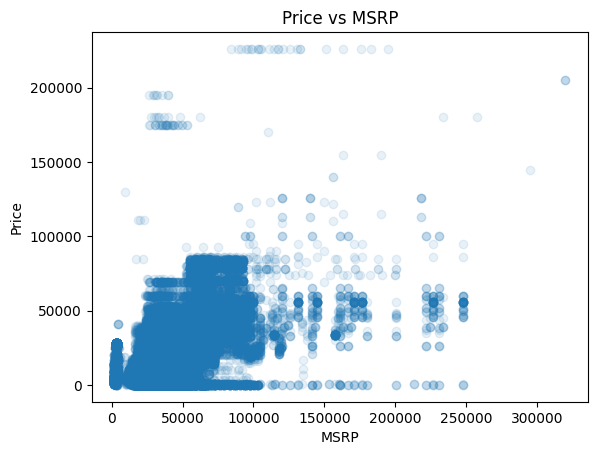

In [20]:
# Visulize the distribution of car listings along the 'msrp' and 'price' axes
# using a scatter plot.

plt.scatter(joined_df['msrp'], joined_df['price'], alpha=0.1)
plt.xlabel('MSRP')
plt.ylabel('Price')
plt.title('Price vs MSRP')
plt.show()

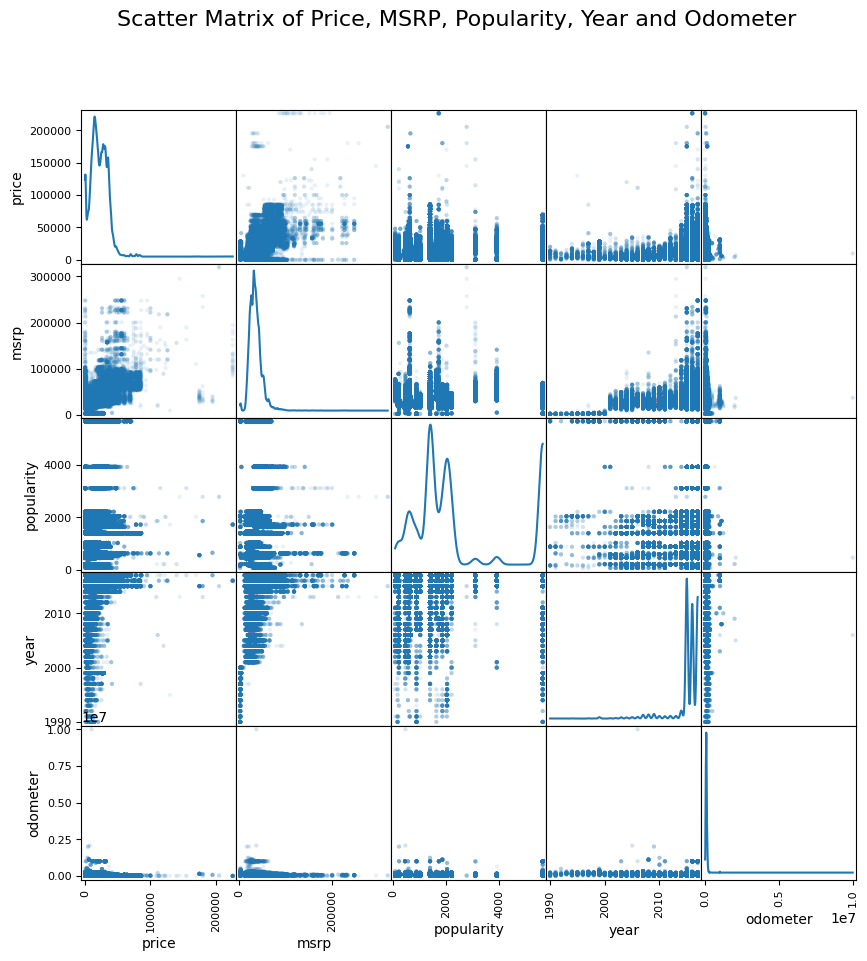

In [21]:
# Create a scatter matrix for the columns 'price', 'msrp', 'popularity', 'year' and 'odometer'

from pandas.plotting import scatter_matrix
scatter_matrix(joined_df[['price', 'msrp', 'popularity', 'year', 'odometer']], alpha=0.1, figsize=(10, 10), diagonal='kde')
plt.suptitle('Scatter Matrix of Price, MSRP, Popularity, Year and Odometer', fontsize=16)
plt.show()

**Task:** Do some further analysis of your own on the joined data. What new insights have you gained?

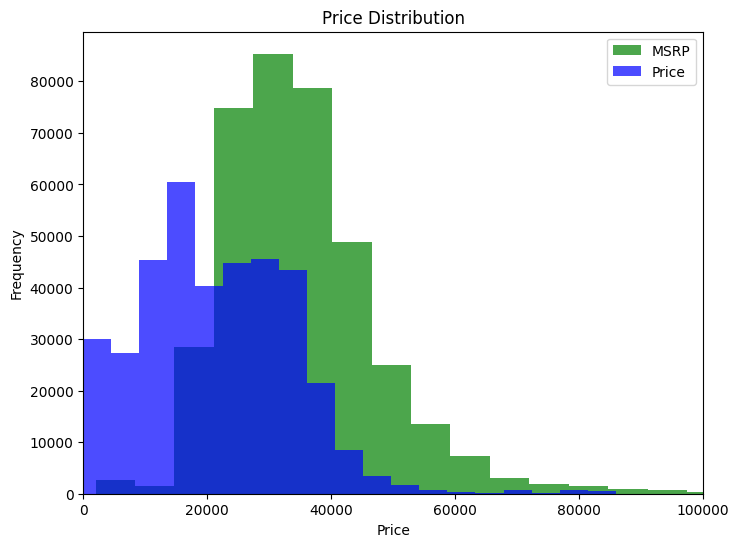

In [22]:
plt.figure(figsize=(8, 6))
plt.xlim(0, 100000)
plt.hist(joined_df['msrp'], bins=50, color='green', alpha=0.7, label='MSRP')
plt.hist(joined_df['price'], bins=50, color='blue', alpha=0.7, label='Price')
plt.legend()
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Dimensionality reduction

Now that we have some more numerical attributes for each of our car listing examples, it has become difficult to visualize the relationship between attributes. We can only plot distributions in 2 or 3 dimensions but we have more than 10 numerical columns.

To combat this limitation, we can reduce the dimensionality of the data using dimensionality reduction techniques such as Principal Component Analysis. One way to look at dimensionality reduction is that we project the full 10+ dimensional dataset onto a 2 dimensional plane, retaining as much of the variability as possible.

Since `price` is the attribute we want to predict, we will not include that in the dimensionality reduction, but rather use the price to analyze the dimensionality reduced data.

In [23]:
# Reduce the dimensionality of the joined dataset

from sklearn.decomposition import PCA

# We will use the numerical attributes of the dataframe, except
# popularity, lat and long, skipping cars driven over 900k miles.
clean_df = joined_df[joined_df.odometer<0.9e6][[
    'odometer', 
    'year', 
    'engine_hp', 
    'engine_cylinders', 
    'number_of_doors',
    'highway_mpg', 
    'city_mpg', 
    'msrp', 
    'price'
]].dropna(axis=0)

# Removing the 'price' column from the dataframe which will
# be transformed.
pca_df = clean_df.drop(columns=['price'])

# Perform PCA to reduce the dimensionality data of 
# pca_df down to two dimensions. Save the result in 
# a variable called X2D.
pca = PCA(n_components=2)

X2D = pca.fit_transform(pca_df)


In [24]:
pca.explained_variance_ratio_

array([0.89976061, 0.10023767])

**Question:** What does this code block tell you?

**Answer:** `That the first PC explaines 90% of the variance in the data, and PC2 explaines 10% of the variance.`

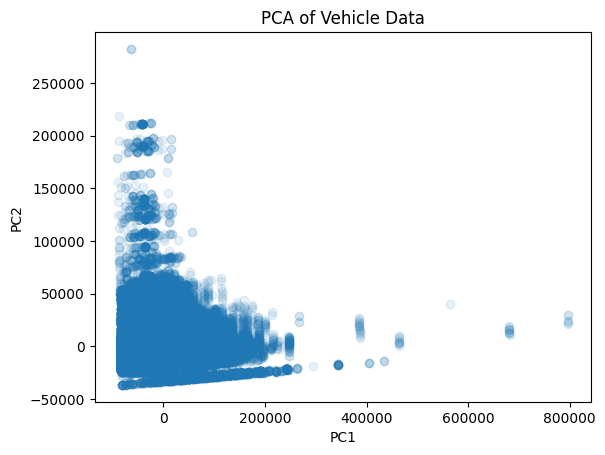

In [25]:
# Create a scatterplot of the projected data

plt.scatter(X2D[:, 0], X2D[:, 1], alpha=0.1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Vehicle Data')
plt.show()

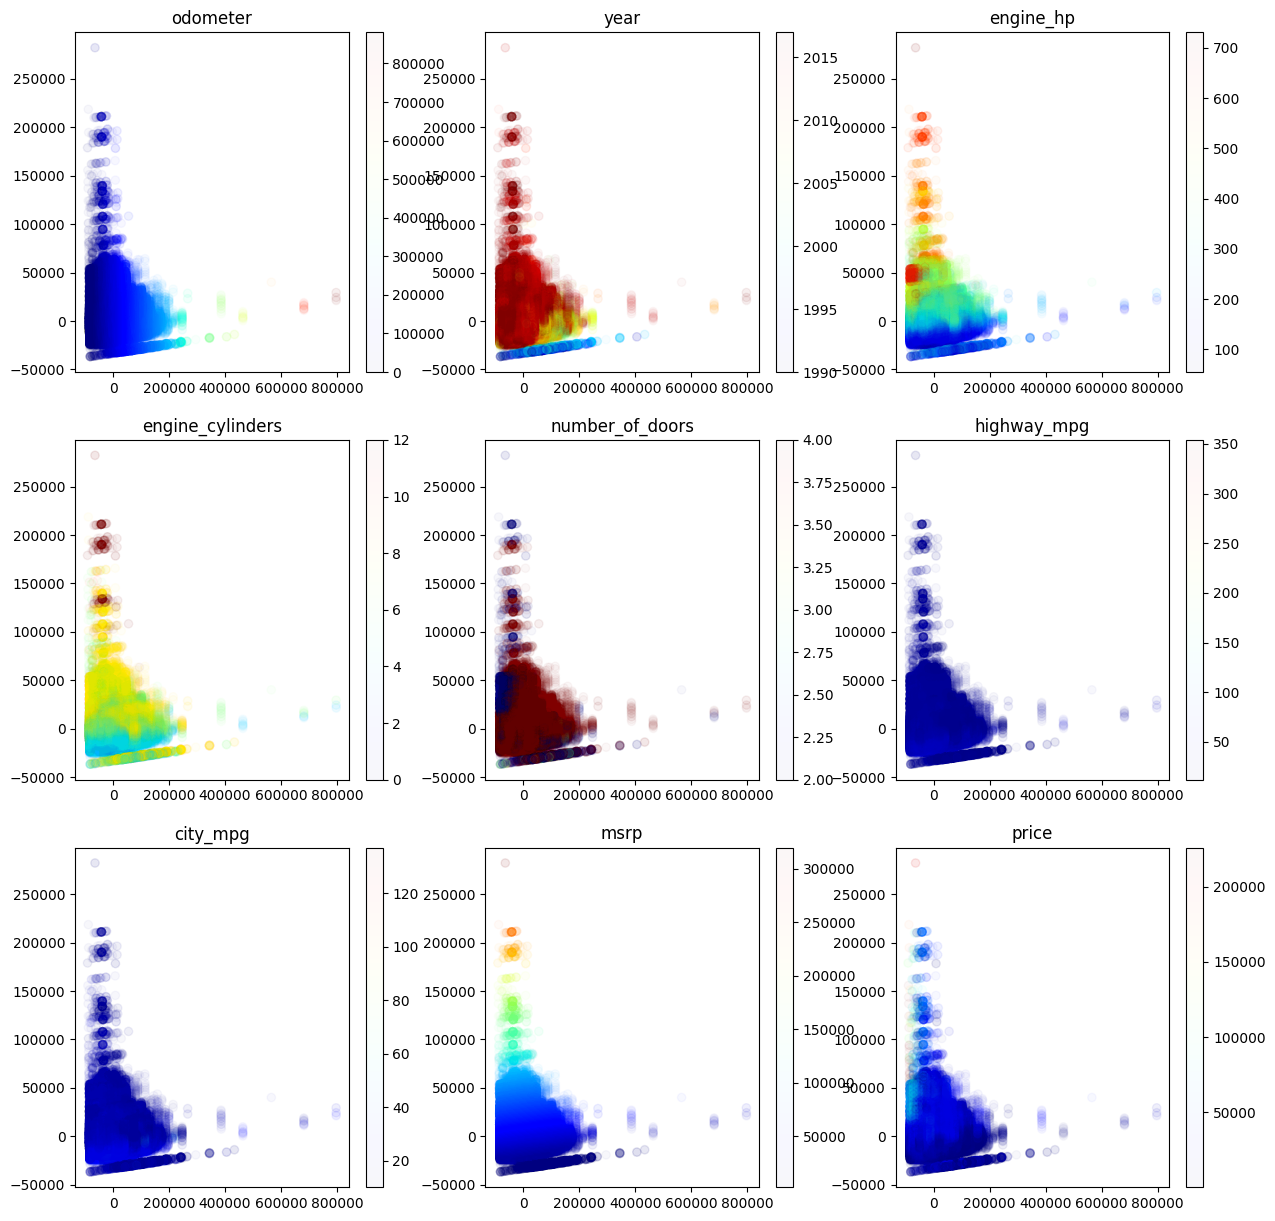

In [26]:
# Create a new 15"x15" figure to hold a 3×3 grid of subplots
plt.figure(figsize=(15, 15))

# Loop over each feature in clean_df to generate one subplot per feature
for i in range(len(clean_df.columns)):
    # Select the (i+1)th cell in a 3×3 grid
    plt.subplot(3, 3, i + 1)

    # Scatter-plot the PCA-transformed data,
    # coloring each point by the value of the current feature
    plt.scatter(
        X2D[:, 0],                        # PC1 values on the x-axis
        X2D[:, 1],                        # PC2 values on the y-axis
        alpha=0.03,                       # Low opacity so dense regions build up
        c=clean_df[clean_df.columns[i]],  # Color array from feature values
        cmap=plt.get_cmap('jet')          # Rainbow colormap for value gradients
    )

    # Title the subplot with the feature name
    plt.title(clean_df.columns[i])

    # Display a colorbar to map colors back to numeric values
    plt.colorbar()

**Question:** What is the code in the cell above doing? How do you interpret the resulting images?

**Answer:** `It shows how the variables spread along the PCs.`

Looking at the plots above, we see some clues that much of the variability in the 'price' attribute can be explained using the 'msrp' and 'odometer' attributes. Do you agree? Is this an intuitive result?

<Axes: xlabel='odometer', ylabel='msrp'>

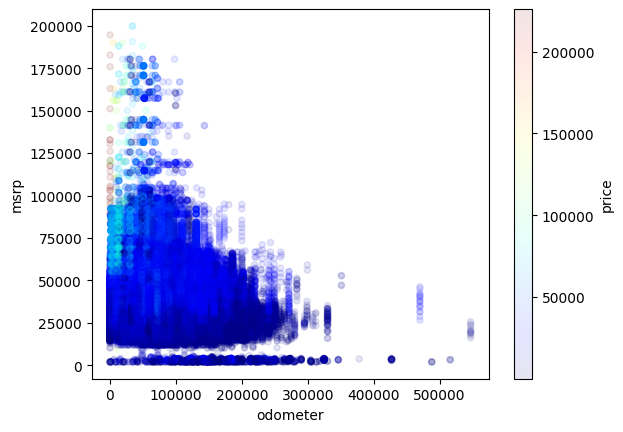

In [27]:
# Creating a scatter plot of the joined data with 'odometer' on the horizontal axis and 'msrp'
# on the vertical axis. Assigning the points on the scatter plot a color according to the price.

joined_df[(joined_df.odometer < 0.6e6) & (joined_df.msrp < 200000)].plot(kind='scatter', y='msrp', x='odometer', alpha=0.1, c='price', cmap=plt.get_cmap('jet'))

**Question:** How does this compare to the plots of the dimensionality reduced data?

**Answer:** `The PCA data is pivoted a bit 'up' from the right and a bit to the left`

## 3D data visualization

Sometimes it can be helpful to view the relationship between three attributes in a three-dimensional plot.

We first create a 2-dimensional scatter plot of the joined data with `odometer` on the horizontal axis and `age` on the vertical axis with `price` represented as the color of the points.

Then for comparison, we plot the points on `odometer`, `age` and `msrp` axes in a three dimensional scatter plot and see if we can find any additional structure to the data which was not apparent in the 2D plot.

For simplicity, only look at the joined data where `odometer` is less than 600,000 miles and where `manufacturer` is `ford`.


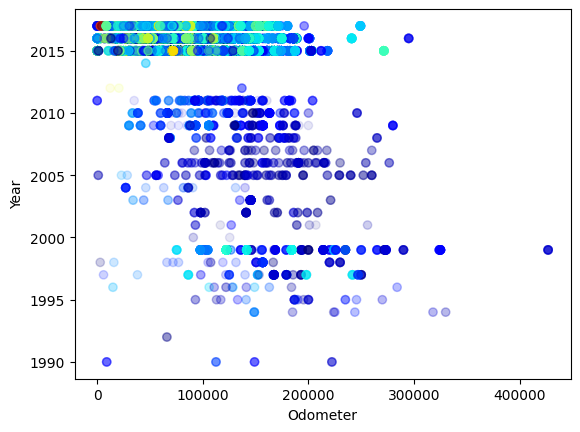

In [28]:
# 2D scatter plot
filtered_df = joined_df[(joined_df.odometer < 0.6e6) & (joined_df.manufacturer == 'ford')]
plt.scatter(filtered_df['odometer'], filtered_df['year'], alpha=0.1, c=filtered_df['price'], cmap=plt.get_cmap('jet'))
plt.xlabel('Odometer')
plt.ylabel('Year')
plt.show()

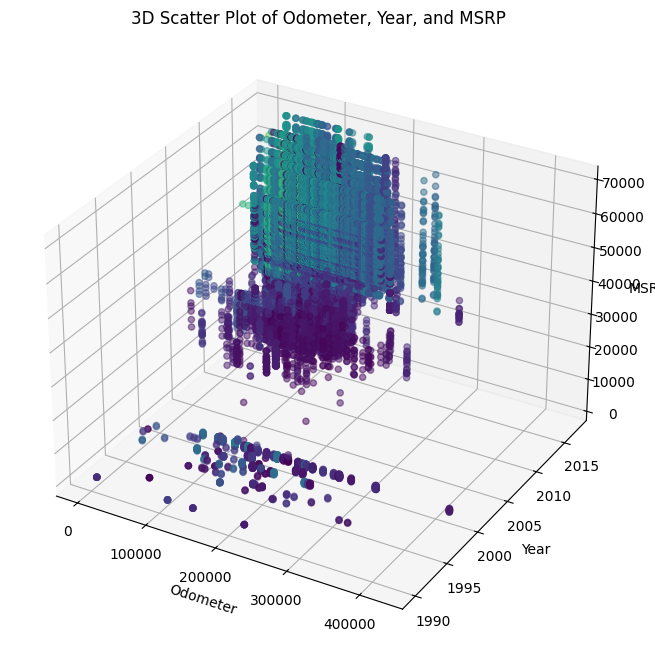

In [29]:
# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(filtered_df['odometer'], filtered_df['year'], filtered_df['msrp'], c=filtered_df['price'], cmap='viridis', alpha=0.5)
ax.set_xlabel('Odometer')
ax.set_ylabel('Year')
ax.set_zlabel('MSRP')
plt.title('3D Scatter Plot of Odometer, Year, and MSRP')
plt.show()

**Task:** Do some of your own exploring. What more insights can you gain from the data before we start doing machine learning?

## Data cleaning

By now we have a pretty good idea of what the data looks like, and some of it's properties. It is almost time to start modeling. But before that, we have to get the data ready for machine learning algorithms.

We will only use the original data from `vehicles.csv` to train machine learning models.

**Question:** Although we will be encoding the values with the datatype `object` as one-hot vectors, there is an argument to be made that some could be encoded as ordinal, or even numeric. Which values could this be? Can you explain what issues this would entail?

**Answer:** ``

In [30]:
# Create a new copy of the 'train_set' dataframe and call it 'cars'

cars = train_set.copy()

First of, remember the huge number of unique `model` values? That is a problem for most Machine Learning algorithms. If we transform the column to a one-hot encoded vector, we would have a 20,978 dimensional vector. This would slow down the training considerably and probably not give good results.

Instead, we will only keep the 50 most populous `model` values and changing all the rest to `unknown`.

In [31]:
N = 50
topN_models = cars.model.value_counts().head(N).index.to_numpy()
cars.loc[~cars['model'].isin(topN_models),'model'] = 'unknown'

Next, we need to deal with missing values.

In [32]:
# Find what percentage of each column of the data is missing
# using the pandas.DataFrame.isnull method and summing 

N = len(cars.index)
cars.isnull().sum()/N

region          0.000000
price           0.000000
year            0.000012
manufacturer    0.000000
model           0.000000
condition       0.385025
cylinders       0.406012
fuel            0.005851
odometer        0.005789
title_status    0.019306
transmission    0.004570
drive           0.301387
size            0.719309
type            0.212027
paint_color     0.296198
description     0.000003
state           0.000000
lat             0.008963
long            0.008963
posting_date    0.000000
dtype: float64

In [33]:
# The 'size' attribute is almost always missing so remove that
# column altogether.

cars.drop(columns=['size'], inplace=True)

In [34]:
# Remove rows where year, odometer, manufacturer, model, are missing

cars.dropna(subset=['year', 'odometer', 'manufacturer', 'model'], inplace=True)

In [35]:
# Our analysis above showed that the attributes 'lat', 'long',
# 'state', 'region', 'posting_date' and  'paint_color' 
# did not seem to hold much predictive value.
# So remove those columns.

cars.drop(columns=[
    'lat', 
    'long', 
    'state', 
    'region', 
    'posting_date', 
    'paint_color'
], inplace=True)

In [36]:
# We are not going to do any modeling on description for now, so remove
# that column.

cars.drop(columns=['description'], inplace=True)

The 'title_status' data column has about 4% of it's values missing. What value should we use to replace the missing ones?

In [37]:
cars.title_status.value_counts()

title_status
clean         304250
rebuilt         5877
salvage         3160
lien            1147
missing          521
parts only       123
Name: count, dtype: int64

Looks like it would make sense to replace missing `title_status` values with `"clean"`.

In [38]:
cars.fillna({'title_status': 'clean'}, inplace=True)

What should we do about the `drive` column? about 30% of rows are missing a `drive` value. The values that `drive` takes are:

In [39]:
cars.drive.value_counts()

drive
4wd    100733
fwd     80223
rwd     43197
Name: count, dtype: int64

It is not trivial how to assign a value when 'drive' is missing, so we will just remove the column for now.

In [40]:
cars.drop(columns=['drive'], inplace=True)

What about the 'type' column? About 20% is missing.

In [41]:
cars.type.value_counts()

type
sedan          66220
SUV            58803
pickup         34515
truck          24727
other          16523
coupe          14320
hatchback      12587
wagon           8388
van             6589
convertible     5826
mini-van        3772
offroad          463
bus              257
Name: count, dtype: int64

Again it is not clear what value we should assign when 'type' is missing. This time, we replace missing with 'unknown'.

In [42]:
cars.fillna({'type': 'unknown'}, inplace=True)

Moving on to the `fuel` attribute. About 6% of the values for `fuel` are missing. What are our options here?

In [43]:
cars.fuel.value_counts()

fuel
gas         271492
other        23023
diesel       19521
hybrid        4081
electric      1306
Name: count, dtype: int64

Here we can probably replace missing with `"gas"` without introducing too much error.

In [44]:
cars.fillna({'fuel': 'gas'}, inplace=True)

We are making progress! Moving on to the 'cylinders' attribute. 40% of values are missing.

In [45]:
cars.cylinders.value_counts()

cylinders
6 cylinders     72880
4 cylinders     59835
8 cylinders     54537
5 cylinders      1306
10 cylinders     1135
other             732
3 cylinders       437
12 cylinders       93
Name: count, dtype: int64

It is tempting to remove the whole column, but we will replace missing `cylinder` values with `"unknown"`.

In [46]:
cars.fillna({'cylinders': 'unknown'}, inplace=True)

4% of values for `transmission` are missing.

In [47]:
cars.transmission.value_counts()

transmission
automatic    251191
other         50673
manual        17993
Name: count, dtype: int64

We can probably get away with replacing missing `transmission` values with `"automatic"`.

In [48]:
cars.fillna({'transmission': 'automatic'}, inplace=True)

Almost there! One more to go. About 38% of the `condition` values
are missing.

In [49]:
cars.condition.value_counts()

condition
good         97355
excellent    77084
like new     16443
fair          5225
new            848
salvage        485
Name: count, dtype: int64

It makes sense to fill the missing `condition` values with `"good"`, both because it is the most common value, but also because intuitively, if we do not know the condition of a car, guessing `"good"` seems to make the least assumptions.

In [50]:
cars.fillna({'condition': 'good'}, inplace=True)

Lets check again how much data is missing:

In [51]:
N=len(cars.index)
print('Number of rows:',N)
cars.isnull().sum()/N

Number of rows: 321136


price           0.0
year            0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
type            0.0
dtype: float64

There should now be no more missing values.

It is usually a good idea to move these data cleaning  steps into a function, so we can quickly load new data and process it for modeling or inference (e.g. when we  run our models on the test set).

In [52]:
top_models = list(cars.model.unique())

def preprocess(df_in):
    
    df = df_in.copy()
    
    df = df.drop(columns=[
        'size', 
        'drive', 
        'lat', 
        'long', 
        'posting_date', 
        'paint_color', 
        'description',
        'state',
        'region'
    ])
    
    df.loc[~df['model'].isin(top_models),'model'] = 'unknown'
    
    df = df.dropna(subset=['year', 'odometer','manufacturer'])
    df.fillna(
        {
            'type':'unknown', 
            'title_status':'clean', 
            'fuel':'gas',
            'cylinders':'unknown',
            'transmission':'automatic', 
            'condition':'good'
        }, inplace=True)

    # Now that we have no more missing data, we create one 
    # dataframe for the labels, 'y', and one for the features.
    X = df.drop('price', axis=1)
    y = df['price'].copy()
    
    return(X,y)

**Task:** Go through the operations in the `preprocess` function and make sure you understand what is being done and why.

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X, y = preprocess(train_set)

num_attribs = list(X.select_dtypes('number'))
cat_attribs = list(X.select_dtypes('object'))

# Create a pipeline which applies a StandardScaler
# transformer on all the numerical features and
# a OneHotEncoder transformer on the categorical 
# features

pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

X_prepared = pipeline.fit_transform(X)

**Question:** What do the `StandardScaler` and `OneHotEncoder` transformers do to the data?

**Answer:** `StandardScaler` standardizes the numeric values in the data. `z = (x-u) / s` where u is the mean and s the standard deviation.

`OneHotEncoder` encode categorical values as a one-hot numeric array. So if fuel type is gas, that column gets the value 1, while all the other fuel types get the value 0. 

**Question**: During our analysis of the data, we transformed the `year` column into an `age` column, but we have not included a custom transformer to do this in our pipeline. Why is is not necessary?

**Answer:** `Because it is perfectly correlated, if year is 2022, age will be 3 etc.`

That's it! We have successfully prepared our data for the next step in the Data Science workflow: *Machine Learning*. We inspected and analyzed our dataset to uncover hidden patterns and relationships, enriched our data by joining it with another dataset and got the data ready for machine learning algorithms by removing missing values, encoding categorical attributes and scaling numerical attributes.

As a final step, we take a sneak peek at the topic of next week's exercise: Training and evaluating Machine Learning models.

In [54]:
# Defining and training a linear regression model on the
# prepared training data

from sklearn.linear_model import LinearRegression

# Create a new LinearRegression object
lin_reg = LinearRegression()

# Fit the model on the prepared features (X_prepared) and target (y)
lin_reg.fit(X_prepared, y)

LinearRegression()

In [55]:
from sklearn.metrics import mean_squared_error

# Use the trained model to generate predictions on the same data
car_predictions = lin_reg.predict(X_prepared)

# Compute the root mean squared error (RMSE) between actual and predicted values
lin_rmse = np.sqrt(mean_squared_error(y, car_predictions))

# Print the RMSE so we have a sense of average prediction error (in target units)
print('Root mean squared error: ', lin_rmse)

Root mean squared error:  11752.17204516028


In [62]:
# Prints the prediction and correct price for a random
# car listing from the training data. Run it a few times
# to get an idea of how accurate the model is.

# Pick a random index from the original X dataset
# np.random.randint is inclusive of low (0), exclusive of high (X.shape[0])

random_index = np.random.randint(0,X.shape[0])

# Extract the row at that index as a one-row DataFrame
random_car = X.iloc[random_index:random_index+1]

# Likewise, get the true price (target) for that same row
random_price = y.iloc[random_index:random_index+1]

# Transform the raw features for this one example through the same pipeline
random_car_prepared = pipeline.transform(random_car)

# Generate the model's price prediction for this single example
random_car_predicted = lin_reg.predict(random_car_prepared)
                                        
print('Our prediction: $' + str(int(random_car_predicted[0])))
print('Real price: $' + random_price.to_string(index=False).strip())

Our prediction: $14250
Real price: $model_id
376
